In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('data/IncidentiModificato.xlsx')
df.head()

,VERBALE,DATA,SESSO,ANNI,PESO,ALTEZZA,BMI,Mezzo,Testa:Neurocranio,Testa:Splancnocranio,...,Scheletro:Rachide-cervicale,Scheletro:Rachide-toracico,Scheletro:Rachide-lombare,Scheletro:Bacino-e-sacro,Scheletro:Complesso-sterno/claveo/costale,Tot Testa,Tot Torace,Tot Addome,Tot Scheletro,Totale
0,85567,1999-10-29,0,81,84.0,1.75,27.428571,0,1,0,...,0,3,0,3,3,2,0,3,9,14
1,85829,2000-01-14,1,69,69.0,1.62,26.291724,1,4,4,...,0,0,0,0,4,20,7,1,4,32
2,85977,2000-03-10,1,71,67.0,1.55,27.887617,1,2,0,...,0,0,0,0,4,6,0,0,4,10
3,86220,2000-06-14,1,54,60.0,1.59,23.733238,1,4,0,...,0,0,0,0,4,5,3,2,4,14
4,86247,2000-06-22,1,78,69.0,1.67,24.740937,1,2,0,...,0,0,0,0,4,2,0,2,4,8


In [3]:
X = df.drop(columns=['VERBALE', 'DATA', 'Mezzo'])
y = df['Mezzo']

In [4]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [107]:
def scatter(x, labels):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(2):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, [0,1][i], fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

In [108]:
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

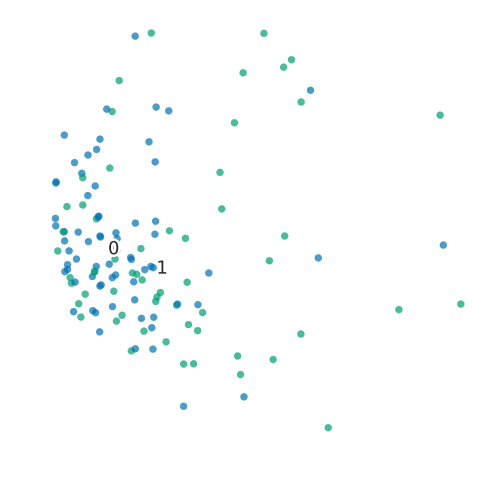

In [109]:
fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int))
plt.show()

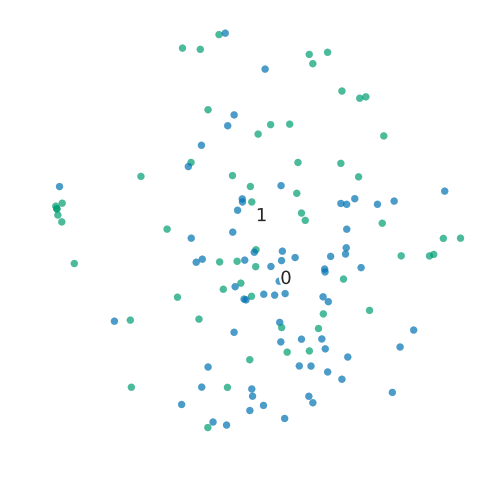

In [110]:
from sklearn.manifold import TSNE

X_tsne = TSNE(perplexity=60, n_iter = 500).fit_transform(X)

fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int))
plt.show()

In [138]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

params = {
    'activation' : ['relu', 'tanh', 'identity'],
    'solver' : ['sgd', 'adam', 'lbfgs'],
    'hidden_layer_sizes': [(10,2), (10), (5,5), (20,10)],
    'learning_rate_init' : [0.5, 0.2, 0.1, 0.01,0.001],
    'max_iter' :[1000, 10000, 100000, 1000000]
}

mlp = MLPClassifier(max_iter=10000, learning_rate='adaptive')

clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5, iid=False)
scores = cross_val_score(clf, X, y, cv=3)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:614: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:614: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:614: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)



Accuracy: 0.62 (+/- 0.03)


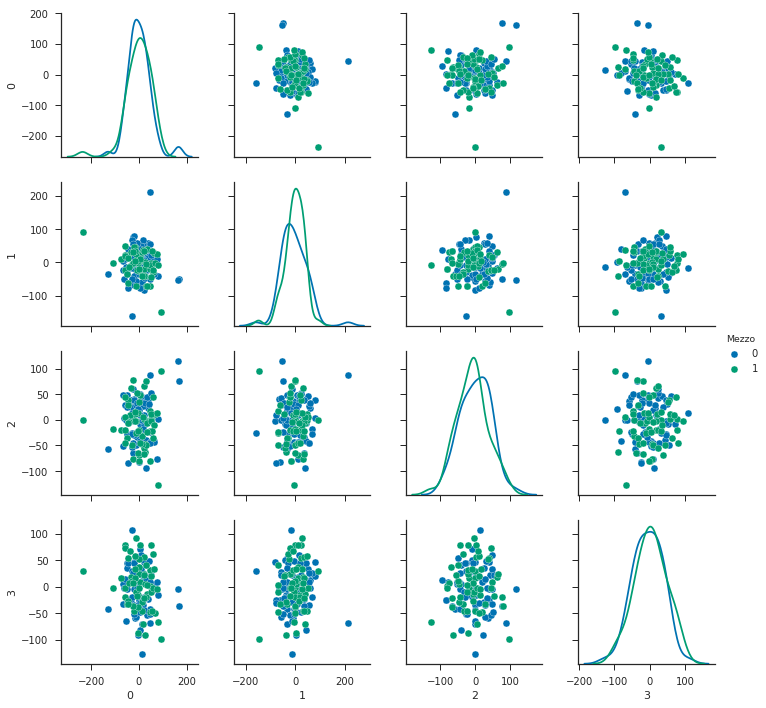

In [140]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
 
X_tsne = TSNE(perplexity=30, n_components=4, method='exact').fit_transform(X)

df_tsne = pd.DataFrame(X_tsne)
df_tsne['Mezzo'] = y

sns.pairplot(df_tsne,  palette="colorblind", diag_kind="kde", hue = 'Mezzo', x_vars=df_tsne.columns[:-1], y_vars=df_tsne.columns[:-1])
plt.show()

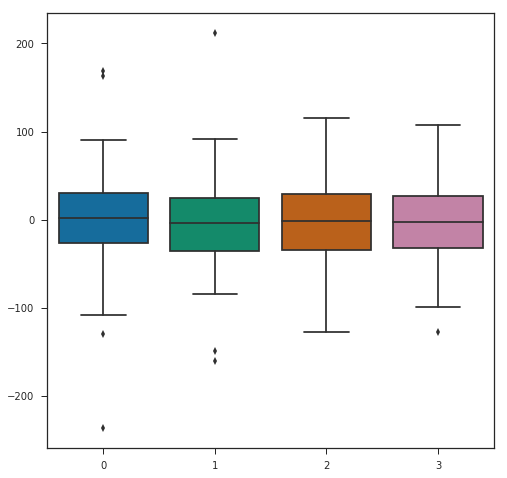

In [141]:
plt.figure(figsize=(8,8))
sns.boxplot(data=X_tsne, palette='colorblind')
plt.show()

array([0.63636364, 0.62790698, 0.60465116])